Pontificia Universidad Católica de Chile <br>
Departamento de Ciencia de la Computación <br>
IIC2433 - Minería de Datos
<br>

<center>
    <h2> Tarea 2 </h2>
    <h1> Pingüinos de Madagascar y los pingüinos perdidos </h1>
    <p>
        Profesor Vicente Domínguez<br>
        Primer semestre 2022    
    </p>
    <br>
    <img src="https://camo.githubusercontent.com/1d187452ac3929cfde8f5760b79f37cc117c1a332227d37a8c50db50d3db632a/68747470733a2f2f616c6c69736f6e686f7273742e6769746875622e696f2f70616c6d657270656e6775696e732f7265666572656e63652f666967757265732f6c7465725f70656e6775696e732e706e67" width="600"/>
</center>

<br>

---

# Indicaciones

Deberás entregar SOLO el archivo .ipynb en el buzón respectivo en canvas. 

**IMPORTANTE**: 
- Se te dará puntaje tanto por código como por la manera en la que respondas las preguntas planteadas. Es decir, si tienes un código perfecto pero este no es explicado o no se responden preguntas asociadas a este, no se tendrá el puntaje completo.
- El notebook debe tener todas las celdas de código ejecutadas. Cualquier notebook que no las tenga no podrá ser corregido.
- El carácter de esta tarea es **INDIVIDUAL**. Cualquier instancia de copia resultará en un 1,1 como nota de curso.


## Librerías

Librerías aceptadas:
- `Numpy`
- `Pandas`
- `Matplotlib`
- `Seaborn`

Clases y funciones aceptadas de la librería `sklearn`:
- `DecisionTreeClassifier` y `plot_tree` del módulo `tree`
- `train_test_split` del módulo `model_selection`
- Funciones de los módulos `metrics` y `preprocessing`

Librerías y funciones prohibidas:
- Cualquier otra función de `sklearn`
- *Cualquier otra librería que maneje y prediga datos* 

<br>

---

# Introducción

Tu gran amigo Skipper y su equipo se encuentran en una misión super secreta para salvar a los pingüinos del malvado Dr. Espiráculo y su secuaz el Basado Vochi Doménguiz. Una vez que hayan terminado deberán reubicar los pingüinos con sus respectivas familias, es por esto que te pide a ti _-oh gran conocedor de los árboles de decisión y los ensambles-_ que implementes un programa que permita clasificar pingüinos para así reubicar a estos plumíferos en base a sus características.

<br>
<center>
<img src="https://misanimales.com/wp-content/uploads/2020/03/pinguinos-madagascar-768x549.jpg?auto=webp&quality=45&width=1920&crop=16:9,smart,safe" width="400"/>

## Descripción dataset

Para esta tarea utilizarás un dataset compuesto de información sobre pingüinos del archipiélago de Palmer. Estos datos fueron obtenidos a partir de [Kaggle](https://www.kaggle.com/datasets/parulpandey/palmer-archipelago-antarctica-penguin-data?select=penguins_lter.csv) y después de ser preprocesados quedó la siguiente información:
- `species`: indica la especie a la que pertenece el pingüino. Este puede tomar 3 valores: Adelie Penguin (_Pygoscelis adeliae_), Chinstrap penguin (_Pygoscelis antarctica_), o Gentoo penguin (_Pygoscelis papua_).
- `culmen_length_mm`: longitud en milímetros del pico.
- `culmen_depth_mm`: profundidad en milímetros del pico.
- `flipper_length_mm`: longitud en milímetros de las aletas.
- `body_mass_g`: masa corporal en gramos.
- `island`: nombre de la isla donde se ubica. Este puede tomar 3 valores:  Dream, Torgersen, o Biscoe.
- `sex`: sexo del pingüino. Este puede tomar dos valores: _female_ o _male_. 
 
El dataset fue dividido en un set de entrenamiento y de testeo (_training_ and _testing_ sets), los cuales deberás utilizar de forma correcta a lo largo de toda tu tarea. 

# Parte 1: Preprocesamiento de los datos (0.5 ptos.)

A continuación, realiza el preprocesamiento de los datos y justifica las decisiones tomadas en el proceso.

In [246]:
import pandas as pd
import numpy as np
from sklearn import preprocessing
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, classification_report ,confusion_matrix
import random
from sklearn.model_selection import train_test_split

In [247]:
X_train = pd.read_csv("X_train.csv")
X_test  = pd.read_csv("X_test.csv")
y_test  = pd.read_csv("y_test.csv")
y_train = pd.read_csv("y_train.csv")
X_train

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex,island
0,46.9,14.6,222.0,4875.0,Female,Torgersen
1,49.8,17.3,198.0,3675.0,Female,Biscoe
2,46.6,17.8,193.0,3800.0,Female,Biscoe
3,53.4,15.8,219.0,5500.0,Male,Torgersen
4,46.7,17.9,195.0,3300.0,Female,Biscoe
...,...,...,...,...,...,...
229,51.3,14.2,218.0,5300.0,Male,Torgersen
230,48.2,15.6,221.0,5100.0,Male,Torgersen
231,40.7,17.0,190.0,3725.0,Male,Biscoe
232,46.8,16.1,215.0,5500.0,Male,Torgersen


Notamos que tenemos dos columnas que tienen valores categoricos, por lo que debemos discretizarlas. Tanto en Los X como los y.


In [248]:
X_train  =  pd.get_dummies(X_train,columns = ['sex', 'island']) # Discretizamos las columnas categoricas
X_test =  pd.get_dummies(X_test,columns = ['sex', 'island']) # Discretizamos las columnas categoricas

encoder = preprocessing.LabelEncoder()
y_train['species'] =  encoder.fit_transform(y_train['species']) # Discretizamos las columnas categoricas
y_test['species'] =  encoder.fit_transform(y_test['species']) # Discretizamos las columnas categoricas
y_train['species'] = y_train['species'].apply(lambda x: x+1)
y_test['species'] = y_test['species'].apply(lambda x: x+1)


Con todo esto, nuestro dataframe de X e y nos quedan de la siguiente manera:

In [249]:
display(X_train)
display(y_train)

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex_Female,sex_Male,island_Biscoe,island_Dream,island_Torgersen
0,46.9,14.6,222.0,4875.0,1,0,0,0,1
1,49.8,17.3,198.0,3675.0,1,0,1,0,0
2,46.6,17.8,193.0,3800.0,1,0,1,0,0
3,53.4,15.8,219.0,5500.0,0,1,0,0,1
4,46.7,17.9,195.0,3300.0,1,0,1,0,0
...,...,...,...,...,...,...,...,...,...
229,51.3,14.2,218.0,5300.0,0,1,0,0,1
230,48.2,15.6,221.0,5100.0,0,1,0,0,1
231,40.7,17.0,190.0,3725.0,0,1,1,0,0
232,46.8,16.1,215.0,5500.0,0,1,0,0,1


,species
0,3
1,2
2,2
3,3
4,2
...,...
229,3
230,3
231,1
232,3


# Parte 2: Árboles de decisión (1.5 ptos.)



Lo primero que debes realizar es implementar un árbol de decisión que permita clasificar los distintos tipos de pingüinos (`y`) en base a un set datos (`X`). 
 
Para esto deberás implementar una clase que tenga los métodos `fit` y `predict`:
- El método `fit` recibe un set `X` e `y`, donde `X` corresponde a un DataFrame e `y` es una serie con la clasificación de cada pingüino. A partir de estos datos, genera y almacena un árbol de decisión.
- El método `predict` solo recibe un set `X` (del mismo número de dimensiones que el usado para `fit`) y utiliza el árbol generado anteriormente para predecir la clase de cada dato de `X`.

El árbol implementado en esta primera parte **NO** debe presentar limitaciones en cuanto a la cantidad de niveles de profundidad que tenga.

In [252]:
class tree():
  def __init__(self):
    self.tree = DecisionTreeClassifier()
  def fit(self, X_train, y_train):
    self.tree.fit(X_train, y_train)
  def predict(self, X_test):
    return self.tree.predict(X_test)



model = tree()
model.fit(X_train,y_train)
y_predict = model.predict(X_test)
print(f"accuracy de: {accuracy_score(y_test,y_predict)}")

print(classification_report(y_test,y_predict))

accuracy de: 0.95
              precision    recall  f1-score   support

           1       0.90      0.97      0.94        39
           2       0.95      0.83      0.89        24
           3       1.00      1.00      1.00        37

    accuracy                           0.95       100
   macro avg       0.95      0.94      0.94       100
weighted avg       0.95      0.95      0.95       100



In [253]:
class tree_max():
  def __init__(self):
    self.tree = DecisionTreeClassifier(max_depth = 3)
  def fit(self, X_train, y_train):
    self.tree.fit(X_train, y_train)
  def predict(self, X_test):
    return self.tree.predict(X_test)

model2 = tree_max()
model2.fit(X_train,y_train)
y_predict2 = model2.predict(X_test)
print(f"accuracy de: {accuracy_score(y_test,y_predict2)}")

print(classification_report(y_test,y_predict2))

accuracy de: 0.94
              precision    recall  f1-score   support

           1       0.88      0.97      0.93        39
           2       0.95      0.79      0.86        24
           3       1.00      1.00      1.00        37

    accuracy                           0.94       100
   macro avg       0.94      0.92      0.93       100
weighted avg       0.94      0.94      0.94       100



A partir de la implementación de ambos árboles de decisión, responde la siguiente pregunta:
> ¿Cuál de los árboles de decisión generó mejores resultados? <br> Justifique su respuesta en base a los resultados del _testing set_ y el uso de métricas de evaluación.  


Los mejores resultados los tuvo el arbol de decicison, sin un maximo de 3 niveles de profundidad con un accuraccy de 95% versus un 94% del que tenia maxima profundidad. A pesar de esto, las diferencias no fueron muchas. Esto talvez se puede explicar de mejor manera con los arboles mostrados, por lo que usaremos plot_tree. 

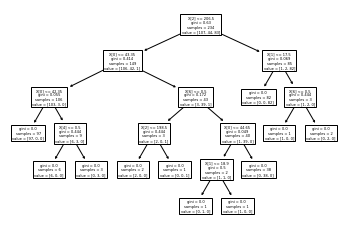

In [234]:
tree_1 = plot_tree(model.tree)

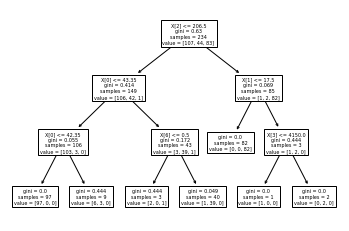

In [235]:
tree_2 =plot_tree(model2.tree)

teniendo esto, notamos que en el arbol sin niveles maximos de profundidad, llega a un total de 5 niveles. Esto podria explicar parte de la poca diferencia de accuracy de prediccion. Ya que a pesar de que en el caso de tener 3 niveles como maximo de profundidad, no se pierden tantas "expansiones" del arbol, por lo que son pocos los casos en los que el arbol sin niveles maximos, llega a las ramas mas inferiores.

# Parte 3: Random Forest (4 ptos.)

A continuación deberas implementar un _Random Forest_ compuesto por 3 árboles de decisión.
 
Para ello deberás crear la clase `RandomForest` que deberá contener los métodos `fit`, `calculate_oob` y `predict`:
- El método `fit` recibe un set `X` e `y`, donde `X` corresponde a un DataFrame e `y` es una serie con la clasificación de cada pingüino. A partir de estos datos, la función genera y almacena los árboles de decisión asociados al _random forest_.
Al momento de generar cada árbol de decisión, deberás realizar lo siguiente:
    1. Para cada árbol a generar:
        1. Obtener un _sample_ aleatorio de 5 de las _features_ que componen `X`.
        2. Separa los datos contenidos en `X` e `y` en un set de entrenamiento y otro de testeo.
        3. Entrenar el árbol de decisión, en base al set de entrenamiento obtenido en el paso anterior.
        4. Almacenar el árbol generado.
    2. Calcula el OOB error del árbol.
- El método `calculate_oob`, calcula el _Out-of-bag error_ del Random Forest. 
- El método `predict` recibe un set `X` (del mismo número de dimensiones que el usado para `fit`) y a partir de los árboles de decisión generados predice la clase a la que pertenece de cada dato de `X`.


In [236]:
def select(first, second):
  keys = []

  for key in first:
    if key in second:
      keys.append(key)

    else:
      pass

  return keys



class RandomForest():
  
  def __init__(self, tree_numbers, max_features):
    self.tree_numbers = tree_numbers
    self.max_features = max_features


  def choice(self, keys, amount): #This return the columns that we want to delete.
    return random.sample(list(keys), amount - self.max_features)

  def fit(self, X_train_initial, y_train_initial):

    self.initial = pd.DataFrame(list(range(0, len(y_train_initial))),  columns =['index_column'])
    self.initial['real'] = y_train_initial['species']
    nulls = [0]*len(y_train_initial)

    for i in range(self.tree_numbers):
      self.initial[f'tree_{i+1}'] = nulls

    self.trees = [0] * self.tree_numbers

    for i in range(self.tree_numbers):
      X_train, X_test, y_train, y_test = train_test_split(X_train_initial, y_train_initial)

      keys = len(X_train.keys()) #here we choose the columns that we are goin to delete
      selected = self.choice(X_train.keys(), keys)
      for column in selected:
        del X_train[f"{column}"]
        del X_test[f"{column}"]

      actual_tree = DecisionTreeClassifier()   # We train the actual tree
      actual_tree.fit(X_train, y_train)
      y_predict = actual_tree.predict(X_test)  # We predict with the random test

      self.trees[i] = actual_tree
      actual = 0
      for index in y_test.index:
        self.initial[f"tree_{i+1}"][index] = y_predict[actual] # We actualize the test dataframe
        actual +=1

    delete = []
    are = []
    for index, row in self.initial.iterrows():
      if row["tree_1"]+row["tree_2"] + row["tree_3"] == 0:
        delete.append(index) #We add to a list the rows that arent in any test option

    self.initial = self.initial.drop(index=delete) # we delete that arent in any test tree



  def calculate_oob(self):
    y_final_prediction = []

    for index, row in self.initial.iterrows():
      trees = row[2:]
      options = [0] * self.tree_numbers

      for option in trees: # Chooice by majority of random if there is only two options and two values.
        if option:
          options[option-1] += 1

      final_decision = options.index(max(options))+1
      y_final_prediction.append(final_decision)
    
    oob_error = 1 - accuracy_score(y_final_prediction, self.initial["real"])
    return oob_error
    
  
  def predict(self, X_test):

    y_predict = []
    y_options = []

    for tree in self.trees:
      del_keys_tree = select(X_test.keys(), tree.feature_names_in_) # we obtain what keys are from this tree
      X_tree = X_test[del_keys_tree]
      y_options.append(tree.predict(X_tree))      #We append to a list to have "columns and row" of the predicted values.

    for row in range(len(X_test)):
      option_trees = [0] * self.tree_numbers

      for index_col in range(len(y_options)):
        option_trees[index_col] = y_options[index_col][row]

      options = [0] * self.tree_numbers
      for option in option_trees:    # Chooice by majority of random if there is only two options and two values.
        if option:
          options[option-1] += 1

      final_decision = options.index(max(options))+1
      y_predict.append(final_decision) #We obtain the value predicted, by majority vote

    return y_predict

In [237]:
model_random_forest = RandomForest(3, 5)
model_random_forest.fit(X_train, y_train) 
print(f"Out-of-bag error obtenido: {round(model_random_forest.calculate_oob(),3)*100}%")
y_predict = model_random_forest.predict(X_test)

print(accuracy_score(y_test,y_predict))

print(classification_report(y_test,y_predict))

Out-of-bag error obtenido: 9.4%
0.99
              precision    recall  f1-score   support

           1       0.97      1.00      0.99        39
           2       1.00      0.96      0.98        24
           3       1.00      1.00      1.00        37

    accuracy                           0.99       100
   macro avg       0.99      0.99      0.99       100
weighted avg       0.99      0.99      0.99       100



A partir de la implementación del _Random Forest_, responde las siguientes preguntas:
> 1. ¿Cuál fue el _Out-of-bag error_ obtenido? ¿Qué se puede hacer para mejorar este valor?

> 2. Comparando con los resultados, ¿qué método dio mejores resultados?  <br> Justifique su respuesta en base a los resultados del _testing set_ y el uso de métricas de evaluación.  


1.   El error fue del 7.1%, lo que se podria hacer para mejorar el valor es intentar 
tener una mayor cantidad de arboles de decision y talvez buscar cual es el mejor parametro para la cantidad de features a elegir, dadas las que tenemos.
2.   El metodo de random forest tuvo un accuraccy de 99%, por lo que vs los otros dos opciones, fue el que tuvo mejores resultados. Esto se puede deber a que al tener distintos arboles posibles. Se hace un sistema de "votacion" donde gana la mayoria. Esto genera que el error disminuya y que sea mas acorde a como deberian ser realmente. Tambien para los casos de empate en este sitema de "votacion" el que aparesca primero es el escogido, debido a que en teoria ambas opciones tienen la misma probabilidad de ser la correcta.


# Bonus

Esta tarea cuenta con una serie de bonus a los que podrás optar. Cabe recalcar que para optar a estos beneficios la nota de tu tarea (sin bonus) debe ser **igual o superior a 3,95** (sin considerar posibles descuentos).

## Meme (1-2 décimas)

Haga un meme relacionado a la material del curso. Si es bueno, podrá optar a décimas extra. 

## Random Forest Parámetrizado (3 décimas)

A partir del código implementado anteriormente, genere una nueva clase que permita un _Random Forest_ donde los siguientes valores sean **variables de instancia** de clase y, que a su vez, permitan modificar el comportamiento del algoritmo:
- `tree_numbers`: int que indica la cantidad de árboles por la que estará compuesto el Random Forest.
- `n_features`: int que indica la cantidad de _features_ a considerar para generar el _sample_ de cada árbol de decisión.
- `criterion`: string que indica la función a utilizar para medir la calidad de un _split_.
- `max_depth`: int que indica la profundidad máxima de los árboles.
- `min_sample_split`: int o float que indica la cantidad mínima de _samples_ requeridos para dividir un nodo de los árboles. 
- `max_features`: int, float o string que indica la cantidad de _features_ a considerar al momento de generar el árbol. 
 
A excepción de `tree_numbers` y `n_features` todas estas variables deben ser opcionales, por lo que queda a tu criterio los valores por defecto a utilizar en cada caso. <br><br>

Para obtener este beneficio, el bonus debe estar implementado en su totalidad, ya que no se entregará puntaje intermedio. 